In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib
from matplotlib import pyplot


In [2]:
optimizer_name = "SGD"
learning_rate = 1e-3
momentum = 0.5
batch_size = 16
epochs = 10
device = "cpu"

In [3]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)


In [4]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()
model = model.to(device)


In [5]:
# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)


In [6]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    log = {'loss': [], '#samples': []}
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X=X.to(device)
        y=y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            log['loss'].append(loss)
            log['#samples'].append(current)
    return log


In [7]:
def test_loop(dataloader, model, loss_fn):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X=X.to(device)
            y=y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


Epoch 1
-------------------------------
loss: 2.339245  [   16/60000]
loss: 2.271472  [ 1616/60000]
loss: 2.250411  [ 3216/60000]
loss: 2.238600  [ 4816/60000]
loss: 2.179914  [ 6416/60000]
loss: 2.140952  [ 8016/60000]
loss: 2.073863  [ 9616/60000]
loss: 1.991262  [11216/60000]
loss: 1.998182  [12816/60000]
loss: 1.864235  [14416/60000]
loss: 1.846140  [16016/60000]
loss: 1.720336  [17616/60000]
loss: 1.593996  [19216/60000]
loss: 1.696870  [20816/60000]
loss: 1.593253  [22416/60000]
loss: 1.431110  [24016/60000]
loss: 1.320170  [25616/60000]
loss: 1.493621  [27216/60000]
loss: 1.308194  [28816/60000]
loss: 1.327893  [30416/60000]
loss: 1.182934  [32016/60000]
loss: 0.929792  [33616/60000]
loss: 0.973058  [35216/60000]
loss: 1.170516  [36816/60000]
loss: 1.347794  [38416/60000]
loss: 0.955215  [40016/60000]
loss: 0.988320  [41616/60000]
loss: 1.038919  [43216/60000]
loss: 0.727251  [44816/60000]
loss: 0.951688  [46416/60000]
loss: 0.927814  [48016/60000]
loss: 0.803667  [49616/60000]


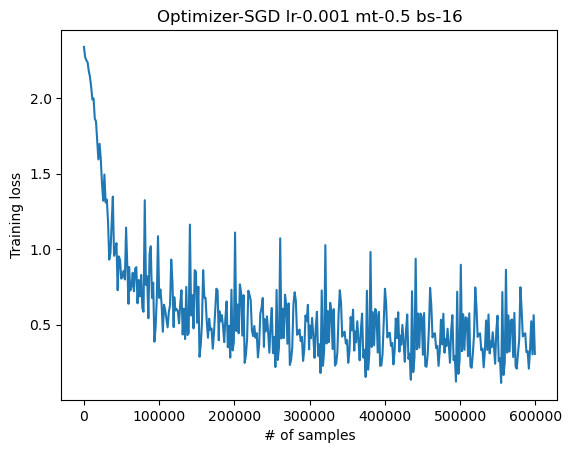

In [8]:
log = {'loss': [], '#samples': []}
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    epoch_log = train_loop(train_dataloader, model, loss_fn, optimizer)
    log['loss'].extend(epoch_log['loss'])
    log['#samples'].extend([ v+60000*t for v in epoch_log['#samples']])
    test_loop(test_dataloader, model, loss_fn)

print("Done!")

pyplot.plot(log['#samples'], log['loss']);
pyplot.xlabel("# of samples");
pyplot.ylabel("Training loss");

title = "Optimizer-{} lr-{} mt-{} bs-{}".format(optimizer_name, learning_rate, momentum, batch_size)
pyplot.title(title);
pyplot.savefig('./'+title+'.png')
pyplot.show()